# <font color='black'>Introduction to Machine Learning</font>





## <font color='black'>Set-Up</font>

---

First we will import the packages that we will need throughout the notebook.

In [1]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
import utils

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## <font color='black'>Support Vector Machines</font>

---
In this session, you will explore the use of support vector machines (SVMs).
We will begin by with a 2D example dataset which can be separated by a linear boundary. 

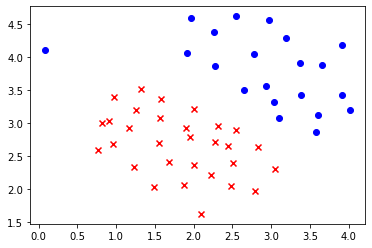

In [2]:
data = loadmat(os.path.join('data', 'ex4data1.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

In this dataset, the positives examples are easily separated from the negative examples by the gap between them. 

You will now study the effect of the parameter $C$. It works similarly to $1/\lambda$, where $\lambda$ is the regularization parameter.
Now you will train the SVM model with $C = 1$. You should find that the SVM puts the decision boundary in the gap between the two populations missclassifying the data point on the far left.

You can try now different values of $C$. In other words you can hange the value of $C$ in the next cell to $C = 100$ and run the SVM training again. For $C = 100$, you will find that the SVM classifies every example correctly.

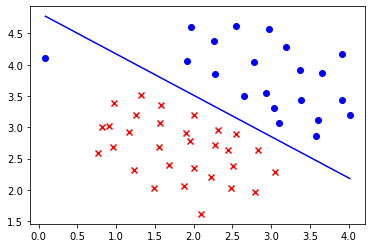

In [3]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1

model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

### SVMs with Gaussian Kernels

You will use now SVMs for non-linear classification. In particular, SVMs with Gaussian kernels will be exploited on datasets that are not linearly separable.

#### Gaussian Kernel

In order to obtain non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. We defined the Gaussian kernel as a similarity function between a pair of examples,
($x^{(i)}$, $x^{(j)}$). The Gaussian kernel is parameterized by $\sigma$, which determines how fast the similarity metric decreases as the examples are further apart.

Complete the code in `gaussianKernel`.

In [4]:
def gaussianKernel(x1, x2, sigma):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x1 and x2.
    
    Parameters
    ----------
    x1 :  numpy ndarray
        A vector of size (n, ), representing the first datapoint.
    
    x2 : numpy ndarray
        A vector of size (n, ), representing the second datapoint.
    
    sigma : float
        The bandwidth parameter for the Gaussian kernel.

    Returns
    -------
    sim : float
        The computed RBF between the two provided data points.
    
    Instructions
    ------------
    Fill in this function to return the similarity between `x1` and `x2`
    computed using a Gaussian kernel with bandwidth `sigma`.
    """
    sim = 0
    # ====================== YOUR CODE HERE ======================

    arg = np.linalg.norm(x1-x2)**2/(2 * sigma**2)
    sim = np.exp(-arg)

    # =============================================================
    return sim

Once you have completed the function `gaussianKernel` the following cell will test your kernel function on two provided examples and you should expect to see a value of 0.324652.

In [5]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



### Example Dataset 2

In the next part of this notebook we will work with dataset 2 displayed below. 

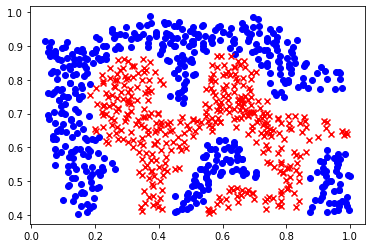

In [6]:
# Load from ex6data2
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('data', 'ex4data2.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

From the figure, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset. If you have correctly implemented the Gaussian kernel function, the following cell will proceed to train the SVM with the Gaussian kernel on this dataset.

In [7]:
# SVM Parameters
C = 1
sigma = 0.1

# model= utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
# utils.visualizeBoundary(X, y, model)

### Example dataset 3
In this part of the exercise, you will gain more practical skills on how to use a SVM with a Gaussian kernel. The code below will load and display a third dataset 

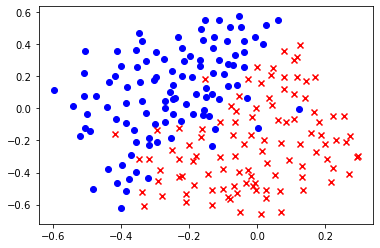

In [8]:
# Load from ex6data3
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('data', 'ex4data3.mat'))
X, y, Xval,yval = data['X'], data['y'][:, 0], data['Xval'], data['yval'][:, 0]

# Plot training data
utils.plotData(X, y)

You will be using the SVM with the Gaussian kernel with this dataset. In the provided dataset, ex4data3.mat, you are given the variables X, y, Xval, yval. The provided code will train the SVM classifier using the training set (X,y) using parameters loaded from dataset3Params 
    Your task is to use the cross validation set Xval, yval to determine the best  and  parameter to use. You should write any additional code necessary to help you search over the parameters $C$ and $\sigma$ . For both $C$ and $\sigma$ we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). Note that you should try all possible pairs of values for $C$ and $\sigma$ (e.g., $C=0.3$ and $\sigma=0.1$). For example, if you try each of the 8 values listed above for $C$ and for $\sigma^2$ , you would end up training and evaluating (on the cross validation set) a total of $8^2 = 64 $ different models. After you have determined the best $C$ and $\sigma$ parameters to use, you should modify the code in dataset3Params, filling in the best parameters.
    
Implementation Help: When implementing cross validation to select the best $C$ and $\sigma$ parameter to use, you need to evaluate the error on the cross validation set. Recall that for classification, the error is defined as the fraction of the cross validation examples that were classified incorrectly. In python, you can compute this error using np.mean(predictions != yval) * 100), where predictions is a vector containing all the predictions from the SVM, and yval are the true labels from the cross validation set. You can use the svmPredict function to generate the predictions for the cross validation set.    

In [9]:
def dataset3Params(X, y, Xval, yval):
    #DATASET3PARAMS returns your choice of C and sigma for Part 3 of the exercise
    #where you select the optimal (C, sigma) learning parameters to use for SVM with RBF kernel
    #[C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and 
    #sigma. You should complete this function to return the optimal C and 
    #sigma based on a cross-validation set.


   #You need to return the following variables correctly.
    C = 1;
    sigma = 0.3;
    # ====================== YOUR CODE HERE ======================
   
    m = yval.shape[0]
    predictions = np.zeros((m,))
    list_predictions = []
    list_couple = []

    STEPS = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

    for C in STEPS:

        for sigma in STEPS:

            model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
            
            for i in range(m):
                predictions[i] = utils.svmPredict(model, Xval[i])
            
            
            # print(f"{j/10}{k} - ", np.mean((predictions != yval)*100))

            list_predictions.append(np.mean((predictions != yval)*100))
            list_couple.append([C, sigma])

    lowest_error = min(list_predictions)
    index = list_predictions.index(lowest_error)
    C, sigma = list_couple[index][0], list_couple[index][1]

    # =============================================================
    return C, sigma

In [10]:
C, sigma = dataset3Params(X, y, Xval, yval);

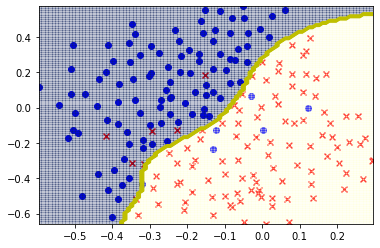

In [11]:
model= utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)